In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [3]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [4]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [3]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [8]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 10ms/step - loss: 0.3906 - val_loss: 0.1881
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1794 - val_loss: 0.1539
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1502 - val_loss: 0.1343
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1321 - val_loss: 0.1210
Epoch 5/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1200 - val_loss: 0.1124
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1124 - val_loss: 0.1064
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1067 - val_loss: 0.1022
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1023 - val_loss: 0.0991
Epoch 9/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0997 - val_loss: 0.0969
Epoch 10/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0980 - val_loss: 0.095

In [9]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

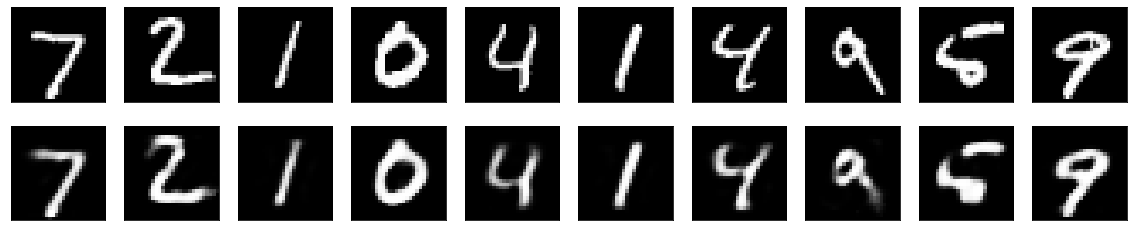

In [10]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [5]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [12]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [13]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 3s 12ms/step - loss: 0.3402 - val_loss: 0.1641
Epoch 2/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1558 - val_loss: 0.1333
Epoch 3/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1315 - val_loss: 0.1226
Epoch 4/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1221 - val_loss: 0.1166
Epoch 5/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1160 - val_loss: 0.1109
Epoch 6/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1119 - val_loss: 0.1078
Epoch 7/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1083 - val_loss: 0.1046
Epoch 8/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1050 - val_loss: 0.1018
Epoch 9/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1027 - val_loss: 0.1003
Epoch 10/100
235/235 [==============================] - 3s 11ms/step - loss: 0.101

235/235 [==============================] - 3s 11ms/step - loss: 0.0827 - val_loss: 0.0825
Epoch 81/100
235/235 [==============================] - 3s 12ms/step - loss: 0.0827 - val_loss: 0.0826
Epoch 82/100
235/235 [==============================] - 3s 11ms/step - loss: 0.0828 - val_loss: 0.0826
Epoch 83/100
235/235 [==============================] - 3s 11ms/step - loss: 0.0826 - val_loss: 0.0826
Epoch 84/100
235/235 [==============================] - 3s 11ms/step - loss: 0.0827 - val_loss: 0.0824
Epoch 85/100
235/235 [==============================] - 3s 12ms/step - loss: 0.0826 - val_loss: 0.0825
Epoch 86/100
235/235 [==============================] - 3s 11ms/step - loss: 0.0825 - val_loss: 0.0822
Epoch 87/100
235/235 [==============================] - 3s 11ms/step - loss: 0.0825 - val_loss: 0.0824
Epoch 88/100
235/235 [==============================] - 3s 11ms/step - loss: 0.0824 - val_loss: 0.0822
Epoch 89/100
235/235 [==============================] - 3s 12ms/step - loss: 0.0824 - 

In [6]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [8]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
469/469 [==============================] - 7s 6ms/step - loss: 0.3122 - val_loss: 0.1449
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1396 - val_loss: 0.1268
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1260 - val_loss: 0.1198
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1198 - val_loss: 0.1165
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1161 - val_loss: 0.1125
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1128 - val_loss: 0.1101
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1101 - val_loss: 0.1074
Epoch 8/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1080 - val_loss: 0.1061
Epoch 9/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1064 - val_loss: 0.1043
Epoch 10/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1052 - val_loss: 0.1032

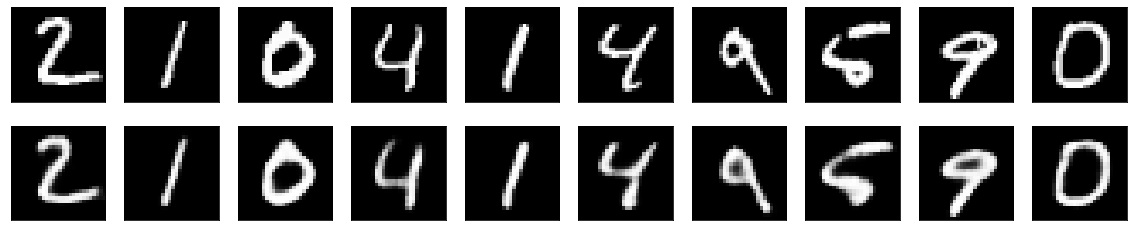

In [20]:
import matplotlib.pyplot as plt
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

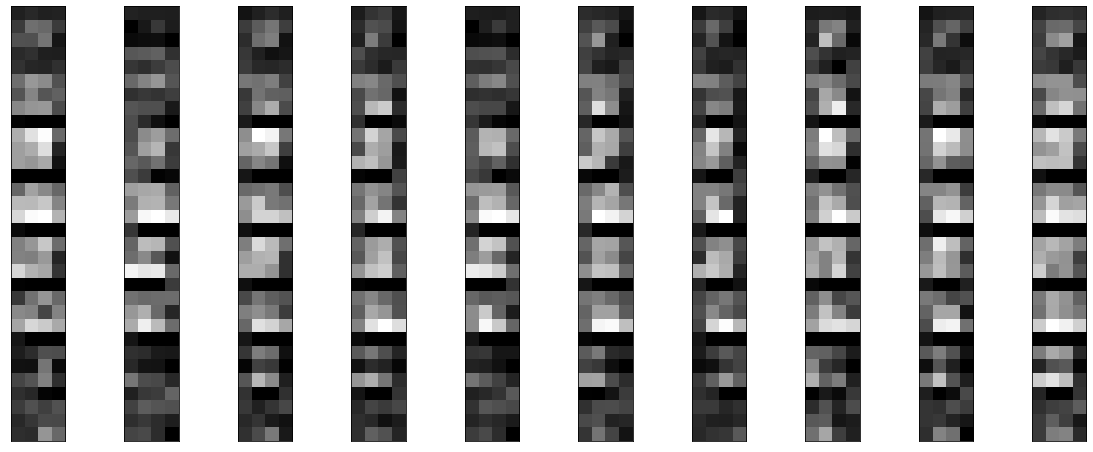

In [21]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [22]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

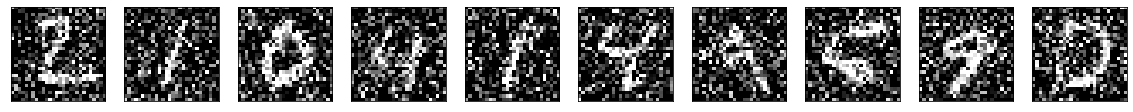

In [23]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [28]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder2 = keras.Model(input_img, decoded)
autoencoder2.compile(optimizer='adam', loss='binary_crossentropy')

In [29]:
autoencoder2.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2636 - val_loss: 0.1194
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1177 - val_loss: 0.1104
Epoch 3/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1101 - val_loss: 0.1058
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1065 - val_loss: 0.1034
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1039 - val_loss: 0.1021
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1025 - val_loss: 0.1008
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1012 - val_loss: 0.0998
Epoch 8/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1001 - val_loss: 0.0991
Epoch 9/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0996 - val_loss: 0.0983
Epoch 10/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0989 - val_lo

469/469 [==============================] - 3s 6ms/step - loss: 0.0934 - val_loss: 0.0937
Epoch 82/100
469/469 [==============================] - 3s 5ms/step - loss: 0.0934 - val_loss: 0.0933
Epoch 83/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0934 - val_loss: 0.0935
Epoch 84/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0933 - val_loss: 0.0934
Epoch 85/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0934 - val_loss: 0.0934
Epoch 86/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0935 - val_loss: 0.0934
Epoch 87/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0933 - val_loss: 0.0937
Epoch 88/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0936 - val_loss: 0.0935
Epoch 89/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0934 - val_loss: 0.0933
Epoch 90/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0933 - val_loss: 

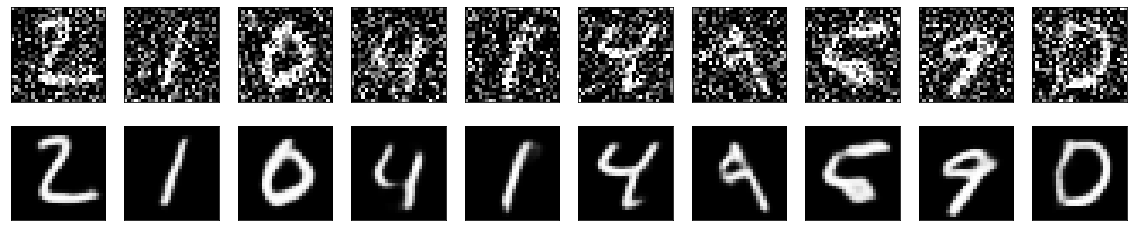

In [31]:
decoded_imgs = autoencoder2.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



In [32]:
# Variational Auto Encoder

In [33]:
original_dim = 28 * 28
intermediate_dim = 64
latent_dim = 2

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

In [34]:
from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [35]:
# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

In [36]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

In [37]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train, x_train,
        epochs=100,
        batch_size=32,
        validation_data=(x_test, x_test))

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 219.1519 - val_loss: 167.4416
Epoch 2/100
1875/1875 [==============================] - 5s 2ms/step - loss: 166.6246 - val_loss: 163.8113
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 163.1605 - val_loss: 161.2340
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 159.7939 - val_loss: 159.2850
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 158.3388 - val_loss: 157.6598
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 156.8358 - val_loss: 156.3280
Epoch 7/100
1875/1875 [==============================] - 5s 2ms/step - loss: 155.3534 - val_loss: 155.0372
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 154.3247 - val_loss: 154.4005
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 153.5975 - val_loss: 153.7191
Epoch 10/100
1875/1875 [=============

Epoch 77/100
1875/1875 [==============================] - 5s 2ms/step - loss: 144.7640 - val_loss: 146.5606
Epoch 78/100
1875/1875 [==============================] - 4s 2ms/step - loss: 144.2935 - val_loss: 146.4697
Epoch 79/100
1875/1875 [==============================] - 4s 2ms/step - loss: 144.4160 - val_loss: 146.2136
Epoch 80/100
1875/1875 [==============================] - 4s 2ms/step - loss: 144.4121 - val_loss: 146.4806
Epoch 81/100
1875/1875 [==============================] - 5s 2ms/step - loss: 144.2085 - val_loss: 146.2654
Epoch 82/100
1875/1875 [==============================] - 4s 2ms/step - loss: 144.4408 - val_loss: 146.0195
Epoch 83/100
1875/1875 [==============================] - 4s 2ms/step - loss: 144.2426 - val_loss: 146.3221
Epoch 84/100
1875/1875 [==============================] - 5s 3ms/step - loss: 144.0601 - val_loss: 146.2115
Epoch 85/100
1875/1875 [==============================] - 4s 2ms/step - loss: 144.4976 - val_loss: 146.3295
Epoch 86/100
1875/1875 [====

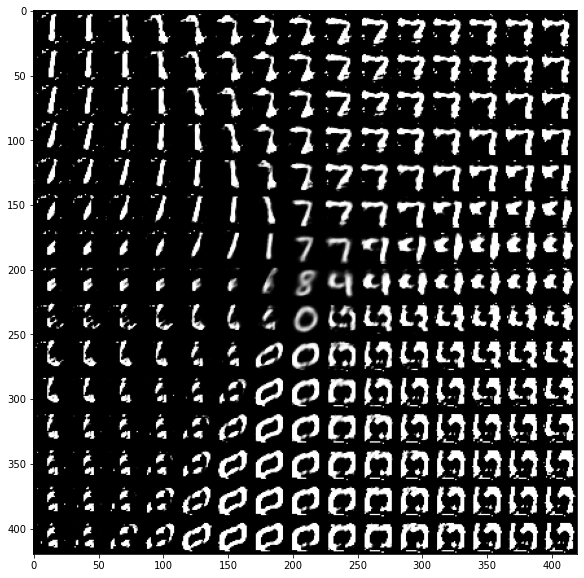

In [40]:
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()